# Weather Data Analysis for Belgrade (2023-08-01 to 2024-07-31) using https://www.visualcrossing.com Weather Data

### Summary
This report analyzes historical weather data for Belgrade to understand basic patterns, such as temperature trends, rainfall distribution, and extreme weather events.


In [1]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Weather_Dataset.csv'
df = pd.read_csv(file_path)

## Data Cleaning


In [2]:
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['precip'] = pd.to_numeric(df['precip'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')

# Drop rows with NaN values in 'temp' or 'precip'
df = df.dropna(subset=['temp', 'precip'])

## Basic Analysis

In [3]:
average_temp = df['temp'].mean()
min_temp = df['temp'].min()
max_temp = df['temp'].max()
total_rainfall = df['precip'].sum()

# Ensure max_temp exists in the dataset
hottest_day_df = df[df['temp'] == max_temp]

if not hottest_day_df.empty:
    hottest_day = hottest_day_df['datetime'].iloc[0]
    print(f"Hottest Day: {hottest_day.strftime('%Y-%m-%d')}")
else:
    print("No day found with the maximum temperature.")

print(f"Average Temperature: {average_temp:.2f}°C")
print(f"Minimum Temperature: {min_temp:.2f}°C")
print(f"Maximum Temperature: {max_temp:.2f}°C")
print(f"Total Rainfall: {total_rainfall:.2f} mm")


Hottest Day: 2023-08-28
Average Temperature: 14.70°C
Minimum Temperature: -7.10°C
Maximum Temperature: 30.70°C
Total Rainfall: 742.43 mm


## Visualization

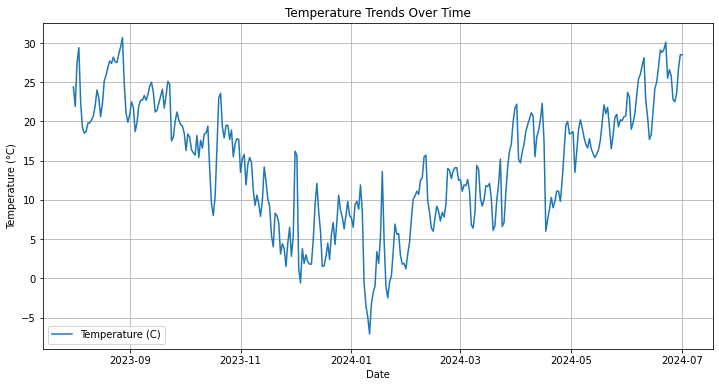

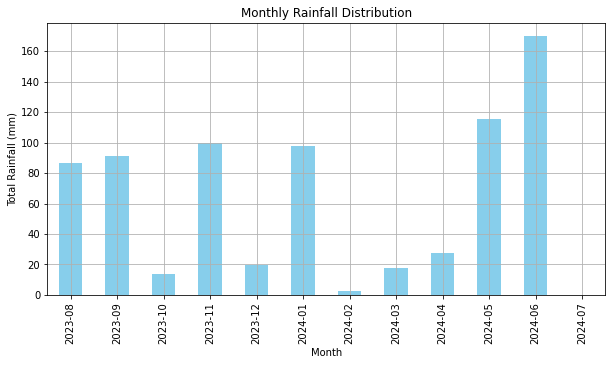

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['temp'], label='Temperature (C)')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

df['Month'] = df['datetime'].dt.to_period('M')
monthly_rainfall = df.groupby('Month')['precip'].sum()

plt.figure(figsize=(10, 5))
monthly_rainfall.plot(kind='bar', color='skyblue')
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True)
plt.show()


## Weather Data Analysis for Belgrade (2023-08-01 to 2024-07-01)

### Data Cleaning
- Handled missing values by dropping incomplete rows.
- Converted date strings to datetime objects for accurate time series analysis.

### Basic Analysis
- **Average Temperature:** 14.70°C
- **Minimum Temperature:** -7.10°C
- **Maximum Temperature:** 30.70°C
- **Total Rainfall:** 742.43 mm

- **Hottest Day:** 2023-08-28

### Visualization
- The line plot shows the temperature trends over the specified period.
- The bar chart shows the monthly rainfall distribution, highlighting wetter and drier months.

### Conclusion
Key patterns and anomalies, such as the hottest day and months with the highest rainfall, have been identified and visualized.
